# <center>Visualizing Deep Neural Networks and Optimization Paths</center>
## <center>Spencer Jenkins</center>
### <center>CS 6804: Optimization in Machine Learning - Final Project</center>

This project is a preliminary implementation of some of the techniques found in the recent paper by Li, et al. [(Visualizing the Loss Landscape of Neural Nets)](https://arxiv.org/abs/1712.09913). We seek to be able to visualize high-dimensional, non-convex objective functions that appear when using a deep neural network. We would also like to be able to visualize the paths that various optimization algorithms take through this loss surface. 

We do this by picking two direction vectors of the same dimension as the parameter vector of the network. These two vectors become the axes for our plots. These are taken as standard normal vectors in this implementation. To capture the path of the optimization algorithm, we can not use random vectors. Instead, we take our direction vectors to be the first two PCA components of the matrix of differences between the final network parameters and the network parameters at each step of the optimization process. We let the user determine which plotting procedure to use by changing the <i>showPath</i> variable.

The user can change the size and shape of the network layers as well as the optimization algorithm and its associated hyperparameters. This allows the user to visually experiment with changing the approach to their problem. Currently, the dataset being used is the MNIST dataset contained in the sklearn.datasets library. 

### Future Work
As stated, this project is preliminary. The original paper did not provide a code repository, so this is an original implementation of the ideas presented in the paper. Thus, we are using a (relatively) small feed-forward network.

The largest difference between this implementation and the paper lies in the scaling of the direction vectors used for plotting. In the paper, a filter-wise normalization was proposed. Because we are not using a convolutional neural network, we do not perform a filter-wise scaling. We chose to scale the direction vectors to the magnitude of the vector containing all the parameters of the network. When plotting the path on the objective function, we do not perform scaling. Eventually, I would like to perform filter-wise scaling for both plotting approachs (with and without the optimization path).

Secondly, the resolution of the plots obtained in this implementation are less than those in the paper. This is due to computing constraints. On 4 GPUs, some of the authors' low resolution plots took around an hour to produce! Some consideration into the computational efficiency of the algorithms used might be a helful future step.

Lastly, we are considering a MLPClassifier from scikit-learn as our network. This made things easier to set up, as well as kept the number of parameters manageable to allow succesful plotting of the objective function. Eventually, it would be nice to allow the user to interface with a larger, more powerful model (e.g., a network created in TensorFlow). Though this would be more computationally taxing, it would probably provide more practical benefit to the user. 

Overall, however, the ability to visualize the objective function and the path of your optimization algorithm through it is of great value to understanding and successfully applying these deep neural networks.

In [1]:
%matplotlib inline

In [2]:
# USER SETTINGS 
# verbose: print statements for debugging
# iterations: number of training iterations
# showPath: display the optimization path on the objective function plot
verbose = True
iterations = 25 #50
showPath = True #True

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_mldata
from sklearn.metrics import log_loss
from sklearn.utils import shuffle
import copy
import matplotlib.pyplot as plt
import numpy as np
# Import MNIST data
mnist = fetch_mldata('MNIST original')
# Split data into training and test sets
mnist.data, mnist.target = shuffle(mnist.data, mnist.target, random_state = 0)
trainData = mnist.data[0:60000,:]/255.
trainLabels = mnist.target[0:60000]
testData = mnist.data[60000:,:]/255.
testLabels = mnist.target[60000:]

In [4]:
# Train network one iteration at a time, saving weights for trajectory visualization

# NOTE: change optimization algorithm by adjusting the 'solver' parameter
# NOTE: the number and shapes of the network's hidden layers can be 
#       modified through the 'hidden_layer_sizes' parameter
network = MLPClassifier(hidden_layer_sizes = (10,10,10,), max_iter = 1, solver='sgd', \
                        learning_rate='constant', warm_start=True, verbose = True)
weights = []
intercepts = []
params = []
for i in range(0,iterations):
    network.fit(trainData,trainLabels)
    w = network.coefs_[0]
    for i in range(1,len(network.coefs_)):
        w = np.append(w,network.coefs_[i])
    inter = network.intercepts_[0]
    for i in range(1,len(network.intercepts_)):
        inter = np.append(inter,network.intercepts_[i])
    params.append(np.reshape(np.append(w,inter),(-1,1)))

Iteration 1, loss = 2.27458428


/Users/bert/anaconda/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 1.97659630
Iteration 3, loss = 1.56892341
Iteration 4, loss = 1.23871473
Iteration 5, loss = 1.01745649
Iteration 6, loss = 0.84916384
Iteration 7, loss = 0.72800790
Iteration 8, loss = 0.64138160
Iteration 9, loss = 0.57607383
Iteration 10, loss = 0.52464105
Iteration 11, loss = 0.48533431
Iteration 12, loss = 0.45660109
Iteration 13, loss = 0.43532459
Iteration 14, loss = 0.41924716
Iteration 15, loss = 0.40661407
Iteration 16, loss = 0.39579202
Iteration 17, loss = 0.38646310
Iteration 18, loss = 0.37826508
Iteration 19, loss = 0.37126972
Iteration 20, loss = 0.36493746
Iteration 21, loss = 0.35861693
Iteration 22, loss = 0.35323892
Iteration 23, loss = 0.34764832
Iteration 24, loss = 0.34293090
Iteration 25, loss = 0.33812171


In [5]:
# Saves the final weights and intercepts of the network 
opt_coeffs = copy.deepcopy(network.coefs_)
opt_intercepts = copy.deepcopy(network.intercepts_)

In [6]:
# Determine the accuracy of the network on the test data
accuracy = np.sum(network.predict(testData) == testLabels)/len(testLabels)
if verbose:
    print('Accuracy:',accuracy)

('Accuracy:', 0)


In [7]:
# Saves the network attributes at the completion of training into a single parameter
# vector. The shapes and lengths of these attributes are also stored for later use
wVals = []
wShapes = []
wLens = []
bVals = []
bShapes = []
bLens = []
for i in range(0,len(network.coefs_)):
    wVals.append(np.reshape(network.coefs_[i],(-1,1)))
    wShapes.append(network.coefs_[i].shape)
    wLens.append(len(wVals[i]))
for i in range(0,len(network.intercepts_)):
    bVals.append(np.reshape(network.intercepts_[i],(-1,1)))
    bShapes.append(network.intercepts_[i].shape)
    bLens.append(len(bVals[i]))
w = np.reshape(network.coefs_[0],(-1,1))
for i in range(1,len(wVals)):
    w = np.reshape(np.append(w,network.coefs_[i]),(-1,1))
for i in range(0,len(bVals)):
    w = np.reshape(np.append(w,network.intercepts_[i]),(-1,1))
w_length = len(w)

In [8]:
# Determines the differences at each optimization step between the current and
# final network parameters
differences = np.zeros((w_length,len(params)-1))
for i in range(0,len(params)-1):
    differences[:,i]=np.reshape((params[-1]-params[i]),w_length)

In [9]:
# Perform PCA on the matrix of differences computed above. 
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(np.transpose(differences))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
# Determine the vectors defining the axes of the visualization.
# If showPath, we take the vectors to be the PCA components determined above.
# If not showPath, we take random normal vectors and scale them to the norm of 
# the final parameter vector.
if showPath:
    d0 = np.reshape(pca.components_[0],(-1,1))
    d1 = np.reshape(pca.components_[1],(-1,1))
else:
    d0 = np.random.randn(w_length,1)
    d0 = d0*np.linalg.norm(params[-1])/np.linalg.norm(d0)
    d1 = np.random.randn(w_length,1)
    d1 = d1*np.linalg.norm(params[-1])/np.linalg.norm(d1)

In [11]:
# Transforms the parameter vectors along the optimization path into the PCA space
transformed = []
for i in range(0,len(params)):
    transformed.append(pca.transform(np.transpose(params[i])))

In [12]:
# Transforms the final parameter vector into the PCA space
w_star_pca = pca.transform(np.transpose(params[-1]))

In [13]:
# Determines the distance between each parameter vector along 
# the optimization path and the final parameter vector
plotPath = []
for i in range(0,len(transformed)):
    plotPath.append(transformed[i] - w_star_pca)

In [14]:
# Determines the coordinates of the optimization path for plotting
x_plot = []
y_plot = []
for i in range(0,len(transformed)):
    x_plot.append(plotPath[i][0][1])
    y_plot.append(plotPath[i][0][0])

In [15]:
# Determine the loss values within a specified range of the final parameters, traveling 
# along the previously computed direction vectors

# Determine the range:
if showPath:
    maxPath = np.max(plotPath)
    minPath = np.min(plotPath)
    boundary = max(abs(maxPath),abs(minPath))+0.2*max(abs(maxPath),abs(minPath))
    optimalRate = boundary*2/10
else:
    boundary = 10
    optimalRate = 2

# NOTE: optimalRate determines the "resolution" of the plot. A smaller number will result in
# a higher resolution, but will take longer to run

alpha = np.arange(boundary,-boundary,-optimalRate)
beta = np.arange(-boundary,boundary,optimalRate)
losses = np.zeros((len(alpha),len(beta)))

# Determine the loss values:
for b in range(0, len(beta)):
    for a in range(0, len(alpha)):
        w_current = params[-1] + alpha[a]*d0 + beta[b]*d1
        network.coefs_[0] = np.reshape(w_current[0:wLens[0]],wShapes[0])
        for i in range(1,len(network.coefs_)):
            network.coefs_[i] = np.reshape(w_current[np.sum(wLens[0:i]):np.sum(wLens[0:i+1])],wShapes[i])
        network.intercepts_[0] = np.reshape(w_current[np.sum(wLens):np.sum(wLens)+bLens[0]],bShapes[0])
        for i in range(1,len(network.intercepts_)):
            network.intercepts_[i] = np.reshape(w_current[np.sum(wLens)+np.sum(bLens[0:i]):np.sum(wLens)+np.sum(bLens[0:i+1])],bShapes[i])
        
        predicted = network.predict_proba(trainData)
        losses[a,b] = log_loss(trainLabels,predicted)
        if verbose:
            print (b,a)

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(2, 0)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(3, 0)
(3, 1)
(3, 2)
(3, 3)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(4, 0)
(4, 1)
(4, 2)
(4, 3)
(4, 4)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(5, 0)
(5, 1)
(5, 2)
(5, 3)
(5, 4)
(5, 5)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(6, 0)
(6, 1)
(6, 2)
(6, 3)
(6, 4)
(6, 5)
(6, 6)
(6, 7)
(6, 8)
(6, 9)
(7, 0)
(7, 1)
(7, 2)
(7, 3)
(7, 4)
(7, 5)
(7, 6)
(7, 7)
(7, 8)
(7, 9)
(8, 0)
(8, 1)
(8, 2)
(8, 3)
(8, 4)
(8, 5)
(8, 6)
(8, 7)
(8, 8)
(8, 9)
(9, 0)
(9, 1)
(9, 2)
(9, 3)
(9, 4)
(9, 5)
(9, 6)
(9, 7)
(9, 8)
(9, 9)


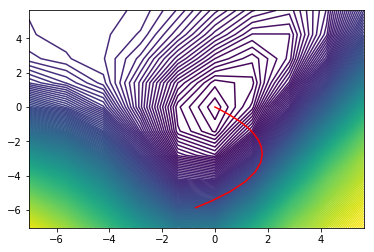

In [16]:
# Plot the objective function (and optimization path)

# Note: the third argument to the plt.contour function is the number of levels to display. If
# you find your plot doesn't contain enough information or is obscured by too much of it, try adjusting this number
if showPath:
    plt.contour(np.arange(-boundary,boundary,optimalRate),np.arange(-boundary,boundary,optimalRate),losses,250)
    plt.plot(x_plot[0:],y_plot[0:],'r-')
else:
    plt.contour(np.arange(-boundary,boundary,optimalRate),np.arange(-boundary,boundary,optimalRate),losses,250)